<H3>Capstone Project - The Battle of Neighborhoods (Week 2)</H3>


# Introduction: Business Problem:
Houston is the fourth most populous city in the United States with a median age of 31. The demographic offers an exciting opportunity for entrepreneurs to open a Bar in the city. However, owning and operating a bar can be a daunting task. Several factors must be considered, such as foot traffic, property prices etc.

The most important factor in opening a bar is the location of the bar. A residential area with many schools for instance would not be a suitable location and might lead to problems such as noise complaints and issues obtaining a liquor license. It is important to pick a location where other bars are operating successfully.

Another important decision is the type of bar. There are several categories of bars such as breweries, pubs etc. and each kind of bar has unique requirements. For instance, a Sports Bar would require additional investment in quality screens and audio systems for patrons to watch events.

In this project we will try to find an ideal location for a Bar. The target audience is an investor looking to open a bar in Houston.

# Data and Solving problem:
We will be using a list of zip codes in Houston scrapped from website – https://www.zip-codes.com/city/tx-houston.asp for analysis. We will use the zipcodes as Input for FourSquare API and fetch all the different bars within a 5000 meters radius.

We will further analyze the top five zipcodes with the maximum number of bars and provide a breakdown of the categories of bars in the area so that the investor can determine which type of bar to open.

In [1]:
#Importing all the required modules that we will use to complete this project

!pip install geocoder
import pandas as pd
import numpy as np
import requests
import matplotlib
import sklearn
import scipy
import geocoder
from geopy.geocoders import Nominatim
from geopy.geocoders import Nominatim
!conda install -c conda-forge folium=0.5.0 --yes
import folium
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster

#geolocator = Nominatim(user_agent="Beer_Garden")
#location = geolocator.geocode("3100 main street Houston")
#print((location.latitude, location.longitude))
#print(location.address)
from pandas.io.json import json_normalize

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
# using zipcode.com to pull Harris County, Houston, TX Zipcodes. 

html = requests.get('https://www.zip-codes.com/city/tx-houston.asp').content
df_list = pd.read_html(html)
df_list
houston_zip = df_list[2]
houston_zip.head(10)
houston_zip.drop(0, inplace=True)
houston_zip.head(10)
houston_zip.rename(columns={0: 'zip code', 1:'flag',2:'county',3:'popu',4:'areacode'}, inplace=True)
houston_zip.head(10)
houston_zip.reset_index()
houston_zip.head(10)
houston_zip.reset_index(inplace=True)
houston_zip.head(10)
houston_zip['zip code'] = houston_zip['zip code'].apply(lambda x: x.split()[2])

# for i in range(0,houston_zip.shape[0]):
#     #print(houston_zip)
#     print(houston_zip['zip code'][i].split()[2])

houston_zip.head()

,index,zip code,flag,county,popu,areacode
0,1,77001,P.O. Box,Harris,0,832 / 713 / 281 / 346
1,2,77002,Standard,Harris,16793,832 / 713 / 281 / 346
2,3,77003,Standard,Harris,10508,832 / 713 / 281 / 346
3,4,77004,Standard,Harris,32692,832 / 713 / 281 / 346
4,5,77005,Standard,Harris,25528,713 / 832 / 346


In [3]:



#url1= 'https://api.foursquare.com/v2/venues/search?client_id=4Z2DOQODLGFSBRMXJSNBMBBCDIU5EN4CLXMXTCZZXERJ3TZY&client_secret=A0U0QYHV24X0ZRAU5P20KH3ZWGU2HZWYGUJOSVD4EQLPLVEL&v=20200101&near=77099&radius=1000&categoryId=4bf58dd8d48988d11d941735'
#result = pd.DataFrame(columns = ['category','addr1','addr2','lat','long','zip','name'])

def get_category_type(row):
    #try:
    categories_list = row['categories']
#     except:
#         categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
###############

ndf1=[]
import json
#import pandas as pd
from pandas.io.json import json_normalize 
for i in range(0,houston_zip.shape[0]):
    durl='https://api.foursquare.com/v2/venues/search?client_id=3TYRX3LESYIPTYNE1ZNHWTQWAIZW1BPGARANUW0QI04VF3HG&client_secret=I305YNB0DSHI3Q5H2UG5UU11SR1QFF2BFO43UVSBNCP3JGIH&v=20200101&near={}&radius=5000&categoryId=4bf58dd8d48988d116941735,50327c8591d4c4b30a586d5d,4bf58dd8d48988d121941735,4bf58dd8d48988d11f941735,4bf58dd8d48988d1d6941735'.format(houston_zip['zip code'][i])
    results = requests.get(durl).json()
    #print(results)
    try:
        venues = results['response']['venues']
    except:
        pass
    #print(venues)
    try:
        nearby_venues = json_normalize(venues)
    except:
        pass
    
    #print(nearby_venues.head())
    
    #ndf.append((categories,location.address, location.formattedAddress, location.lat, location.lng,location.postalCode,name))
    try:
        filtered_columns = ['categories','location.address', 'location.formattedAddress', 'location.lat', 'location.lng','location.postalCode','name']
        nearby_venues =nearby_venues.loc[:, filtered_columns]
    except:
        pass
    #print(nearby_venues.head())
    
    try:
        nearby_venues['categories'] = nearby_venues.apply(get_category_type, axis=1)
    except:
        pass
    #nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

    #print(nearby_venues.head())
    #nearby_venues['categories']
    
    
    
    ndf1.append(nearby_venues)
    
    #ndf = ndf.append((categories,location.address, location.formattedAddress, location.lat, location.lng,location.postalCode,name), ignore_index=True)
    
    #ndf1.append(nearby_venues, ignore_index=True)


    

In [4]:
a= pd.concat(ndf1)
a
bardata= a.reset_index()
bardata=bardata.dropna()
bardata

,index,categories,location.address,location.formattedAddress,location.lat,location.lng,location.postalCode,name
1,1,Mexican Restaurant,3522 Irvington Blvd,"[3522 Irvington Blvd (Collingsworth), Houston,...",29.792941,-95.360721,77009,Fiesta Guadalajara
2,2,Bar,5802 Fulton St,"[5802 Fulton St, Houston, TX 77009, United Sta...",29.811784,-95.369357,77009,Monkey’s Tail
3,3,Distillery,5610 Clinton Dr,"[5610 Clinton Dr, Houston, TX 77020, United St...",29.761559,-95.310824,77020,Gulf Coast Distillers
6,6,Bar,3737 Dabney St,"[3737 Dabney St, Houston, TX 77026, United Sta...",29.794214,-95.310913,77026,Muller's Bar
8,8,Bar,8001 Mesa Dr,"[8001 Mesa Dr, Houston, TX 77028, United States]",29.835943,-95.262523,77028,Seville Club
9,9,Lounge,843 Boyles St,"[843 Boyles St, Houston, TX 77020, United States]",29.773025,-95.298573,77020,Kandi Lounge
13,13,Bar,8402 Homestead Rd,"[8402 Homestead Rd, Houston, TX 77028, United ...",29.838596,-95.301819,77028,Club Menai
14,14,Bar,2727 North Fwy,"[2727 North Fwy, Houston, TX 77009, United Sta...",29.799412,-95.372472,77009,Vara's Lounge
15,15,Wine Bar,2811 Collingsworth St,"[2811 Collingsworth St, Houston, TX 77026, Uni...",29.793900,-95.342003,77026,Sams Liquor
16,16,Pub,5903 Fulton St,"[5903 Fulton St, Houston, TX 77009, United Sta...",29.812672,-95.370122,77009,Korner Bar


In [5]:
#bardata.to_csv('C:/Users/kdalal/Desktop/Python Data/Bar2.csv',index=False)

In [6]:
bardata.head()

,index,categories,location.address,location.formattedAddress,location.lat,location.lng,location.postalCode,name
1,1,Mexican Restaurant,3522 Irvington Blvd,"[3522 Irvington Blvd (Collingsworth), Houston,...",29.792941,-95.360721,77009,Fiesta Guadalajara
2,2,Bar,5802 Fulton St,"[5802 Fulton St, Houston, TX 77009, United Sta...",29.811784,-95.369357,77009,Monkey’s Tail
3,3,Distillery,5610 Clinton Dr,"[5610 Clinton Dr, Houston, TX 77020, United St...",29.761559,-95.310824,77020,Gulf Coast Distillers
6,6,Bar,3737 Dabney St,"[3737 Dabney St, Houston, TX 77026, United Sta...",29.794214,-95.310913,77026,Muller's Bar
8,8,Bar,8001 Mesa Dr,"[8001 Mesa Dr, Houston, TX 77028, United States]",29.835943,-95.262523,77028,Seville Club


In [7]:
bardata1 = bardata[['name','categories','location.address','location.lat','location.lng','location.postalCode']]

In [8]:
#bardata1.head()
bardata1
bardata1.to_csv('C:/Users/kdalal/Desktop/Python Data/Bar22020v2catgry.csv',index=False)

In [9]:
#Preprocessing the data and droping the duplicates from the dataframe.

bard= bardata1.drop_duplicates()
bd= bard.reset_index()
#bd.head()
bd
#bd.to_csv('C:/Users/kdalal/Desktop/Python Data/Barzip21720.csv',index=False)

,index,name,categories,location.address,location.lat,location.lng,location.postalCode
0,1,Fiesta Guadalajara,Mexican Restaurant,3522 Irvington Blvd,29.792941,-95.360721,77009
1,2,Monkey’s Tail,Bar,5802 Fulton St,29.811784,-95.369357,77009
2,3,Gulf Coast Distillers,Distillery,5610 Clinton Dr,29.761559,-95.310824,77020
3,6,Muller's Bar,Bar,3737 Dabney St,29.794214,-95.310913,77026
4,8,Seville Club,Bar,8001 Mesa Dr,29.835943,-95.262523,77028
5,9,Kandi Lounge,Lounge,843 Boyles St,29.773025,-95.298573,77020
6,13,Club Menai,Bar,8402 Homestead Rd,29.838596,-95.301819,77028
7,14,Vara's Lounge,Bar,2727 North Fwy,29.799412,-95.372472,77009
8,15,Sams Liquor,Wine Bar,2811 Collingsworth St,29.793900,-95.342003,77026
9,16,Korner Bar,Pub,5903 Fulton St,29.812672,-95.370122,77009


In [10]:
# from bs4 import BeautifulSoup, SoupStrainer
# import requests


# url = "https://www.google.com/search?q=77586+zip+code+neighborhood"
# page = requests.get(url)
# data = page.text
# soup = BeautifulSoup(data, 'html.parser')
# text = soup.find('div',attrs={'class': 'BNeawe deIvCb AP7Wnd'})

# print(text.text)



In [11]:
# t=bd[bd['location.postalCode'].isnull()]
# t
#t.shape
#filtered_df = df[df['var2'].isnull()]

In [12]:

bd.groupby('categories').count().iloc[:,0]

categories
American Restaurant           22
Arcade                         1
Argentinian Restaurant         1
Asian Restaurant               1
BBQ Joint                      1
Bar                          168
Beer Bar                      10
Beer Garden                   22
Beer Store                     1
Bowling Alley                  5
Brewery                       32
Burger Joint                   1
Business Service               1
Café                           4
Cajun / Creole Restaurant      2
Caribbean Restaurant           1
Cocktail Bar                  22
Coffee Shop                    5
Concert Hall                   2
Convention Center              1
Cuban Restaurant               1
Distillery                     1
Dive Bar                      20
Event Space                    1
French Restaurant              2
Gastropub                      7
Gay Bar                        4
General Entertainment          2
German Restaurant              1
Golf Course                    1

In [13]:
print('There are {} uniques bar/restaurant categories.'.format(len(bd['categories'].unique())))

There are 73 uniques bar/restaurant categories.


In [14]:
# create map of Houston using latitude and longitude values
map_bd = folium.Map(location=[29.749907, -95.358421], zoom_start=12)
# label = folium.Popup("Cajun's Creole Restaurant",parse_html=True)#parse_html=True
# folium.CircleMarker(
#         [29.719999,-95.488998],
#         radius=3,
#         popup=label,
#         color='blue',
#         fill=True,
#         fill_color='#3186cc',
#         fill_opacity=0.7,
#         parse_html=False).add_to(map_bd)


# add markers to map
#i=0
for lat, lng, label, in zip(bd['location.lat'], bd['location.lng'], bd['categories']+" - "+bd['name'],):
        #if i < 1000:
            label = folium.Popup(label,parse_html=True)#parse_html=True
            folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='light blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_bd)#parse_html=True
            #i=i+1
    

# add pop-up text to each marker on the map
# latitudes = list(bd['location.lat'])
# longitudes = list(bd['location.lng'])
# labels = list(bd['categories'])

# for lat, lng, label in zip(latitudes, longitudes, labels):
#     folium.Marker([lat, lng], popup=label).add_to(map_bd) 
    
map_bd
#map_bd.to_csv('C:/Users/kdalal/Desktop/Python Data/houstonmap.csv',index=False)

#bardata.to_csv('C:/Users/kdalal/Desktop/Python Data/Bar2.csv',index=False)

In [15]:
nobarspc=bd.groupby('location.postalCode').count().iloc[:,0]
nobarspc= pd.DataFrame(nobarspc)
nobarspc= nobarspc
nobarspc.head()
nobarspc1 = nobarspc.rename(index={'location.postalCode': "postalcode", 'index'"": "count"})
nobarspc1.head()
#type(list(nobarspc1['location.postalCode']))

,index
location.postalCode,
77002,24
77003,10
77004,7
77005,7
77006,22


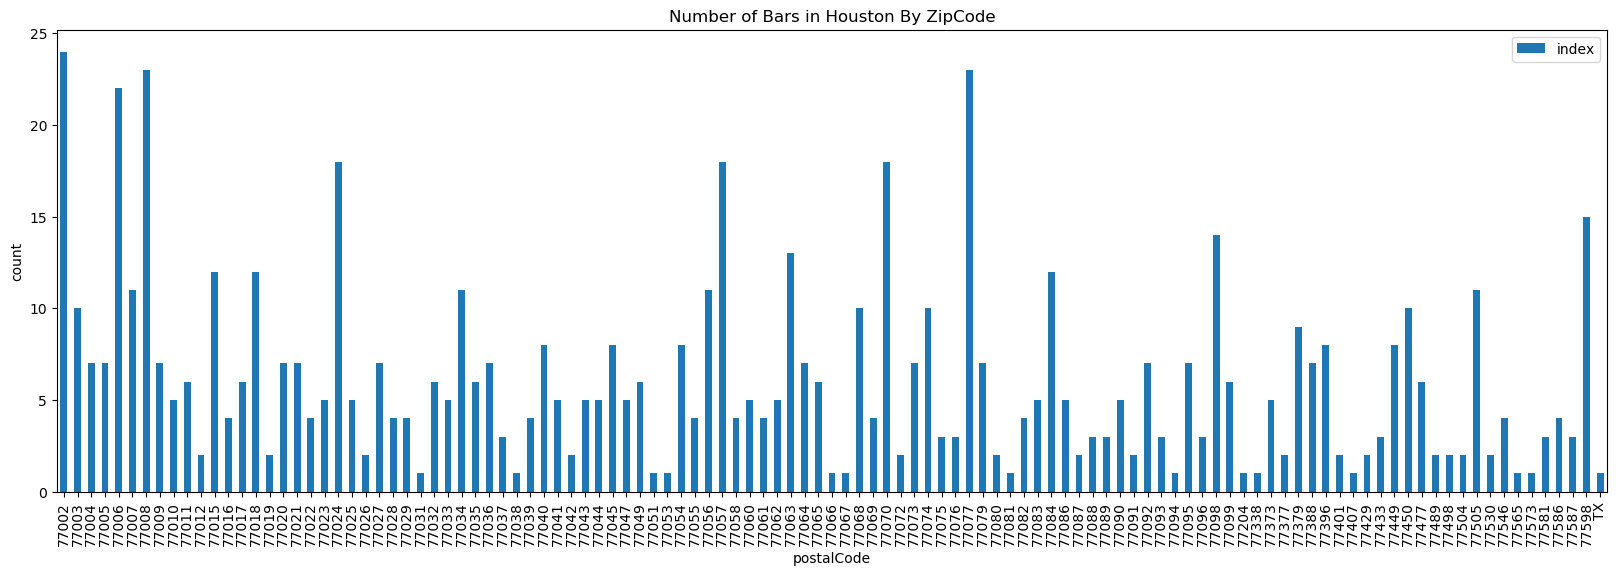

In [16]:
# import matplotlib.pyplot as plt
# ax = nobarspc1.plot.bar(x='location.postalCode', y='index', rot=0)


import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#nobarspc1 = nobarspc1('index',ascending=False)

nobarspc1.plot(kind='bar', figsize=(20, 6))

plt.xlabel('postalCode') # add to x-label to the plot
plt.ylabel('count') # add y-label to the plot
plt.title('Number of Bars in Houston By ZipCode') # add title to the plot

plt.show()

In [17]:
bd1 = pd.get_dummies(bd[['categories']], prefix="", prefix_sep="")


bd1['location.postalCode'] = bd['location.postalCode'] 


fixed_columns = [bd1.columns[-1]] + list(bd1.columns[:-1])
bd1 = bd1[fixed_columns]

bd1.head()

,location.postalCode,American Restaurant,Arcade,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bar,Beer Bar,Beer Garden,Beer Store,...,Strip Club,Sushi Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tiki Bar,Travel Lounge,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint
0,77009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77009,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,77020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,77026,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,77028,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
bdg = bd1.groupby('location.postalCode').mean().reset_index()
bdg

,location.postalCode,American Restaurant,Arcade,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bar,Beer Bar,Beer Garden,Beer Store,...,Strip Club,Sushi Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tiki Bar,Travel Lounge,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint
0,77002,0.000000,0.000000,0.000000,0.0,0.0,0.291667,0.083333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.041667,0.125000,0.000000
1,77003,0.000000,0.000000,0.000000,0.0,0.0,0.200000,0.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,77004,0.000000,0.000000,0.000000,0.0,0.0,0.428571,0.142857,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,77005,0.000000,0.000000,0.000000,0.0,0.0,0.285714,0.142857,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.142857,0.000000
4,77006,0.000000,0.000000,0.000000,0.0,0.0,0.181818,0.000000,0.090909,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.045455,0.090909,0.000000
5,77007,0.090909,0.000000,0.000000,0.0,0.0,0.363636,0.000000,0.090909,0.090909,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
6,77008,0.043478,0.000000,0.000000,0.0,0.0,0.130435,0.086957,0.043478,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.043478,0.000000,0.130435,0.000000
7,77009,0.000000,0.000000,0.000000,0.0,0.0,0.428571,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.142857,0.0,0.000000,0.000000,0.142857,0.000000
8,77010,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
9,77011,0.000000,0.000000,0.000000,0.0,0.0,0.333333,0.000000,0.333333,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.333333,0.000000


In [19]:
# a=bdg
# a
# a=a.'location.postalCode'=='77002'
# a

In [20]:
bdg.shape

(113, 74)

In [21]:
num_top_venues = 5

for postalcode in bdg['location.postalCode']:
    print("----"+postalcode+"----")
    temp = bdg[bdg['location.postalCode'] == postalcode].T.reset_index()
    temp.columns = ['categories','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----77002----
     categories  freq
0           Bar  0.29
1  Cocktail Bar  0.12
2      Wine Bar  0.12
3        Lounge  0.08
4      Beer Bar  0.08


----77003----
     categories  freq
0       Brewery   0.3
1           Bar   0.2
2      Beer Bar   0.1
3  Cocktail Bar   0.1
4    Hookah Bar   0.1


----77004----
     categories  freq
0           Bar  0.43
1       Brewery  0.14
2      Beer Bar  0.14
3  Cocktail Bar  0.14
4    Sports Bar  0.14


----77005----
           categories  freq
0                 Bar  0.29
1             Brewery  0.14
2            Wine Bar  0.14
3            Beer Bar  0.14
4  Italian Restaurant  0.14


----77006----
    categories  freq
0          Bar  0.18
1      Gay Bar  0.09
2     Wine Bar  0.09
3          Pub  0.09
4  Beer Garden  0.09


----77007----
            categories  freq
0                  Bar  0.36
1  American Restaurant  0.09
2          Beer Garden  0.09
3            Gastropub  0.09
4                 Café  0.09


----77008----
     categories  freq
0   

           categories  freq
0                 Bar  0.50
1             Brewery  0.25
2  Seafood Restaurant  0.25
3         Music Venue  0.00
4         Pizza Place  0.00


----77056----
            categories  freq
0            Hotel Bar  0.18
1  American Restaurant  0.09
2   Tex-Mex Restaurant  0.09
3               Lounge  0.09
4            Gastropub  0.09


----77057----
                 categories  freq
0                       Bar  0.17
1                Sports Bar  0.17
2  Mediterranean Restaurant  0.11
3                Strip Club  0.06
4        Mexican Restaurant  0.06


----77058----
            categories  freq
0             Dive Bar  0.50
1   Seafood Restaurant  0.25
2                  Bar  0.25
3  American Restaurant  0.00
4          Music Venue  0.00


----77060----
     categories  freq
0      Wine Bar   0.4
1        Lounge   0.2
2           Bar   0.2
3  Cocktail Bar   0.2
4   Music Venue   0.0


----77061----
              categories  freq
0            Wings Joint  0.25
1     

            categories  freq
0          Beer Garden   1.0
1  American Restaurant   0.0
2          Music Store   0.0
3          Pizza Place   0.0
4   Persian Restaurant   0.0


----77429----
            categories  freq
0   Mexican Restaurant   0.5
1           Sports Bar   0.5
2  American Restaurant   0.0
3          Music Venue   0.0
4   Persian Restaurant   0.0


----77433----
           categories  freq
0             Brewery  0.33
1            Wine Bar  0.33
2         Karaoke Bar  0.33
3         Music Store  0.00
4  Persian Restaurant  0.00


----77449----
            categories  freq
0           Sports Bar  0.38
1  American Restaurant  0.12
2             Wine Bar  0.12
3                  Bar  0.12
4           Hookah Bar  0.12


----77450----
            categories  freq
0                  Bar   0.3
1  American Restaurant   0.2
2           Sports Bar   0.2
3             Wine Bar   0.1
4          Beer Garden   0.1


----77477----
            categories  freq
0                  Bar  0.3

In [22]:
df1 =nobarspc1.sort_values('index',ascending=False).head(5)
df1.index.values


#df1[['location.postalCode','index']]
# for col in df1.columns: 
#     print(col) 
#['location.postalCode']

array(['77002', '77077', '77008', '77006', '77024'], dtype=object)

In [23]:
top5bd=bd[bd['location.postalCode'].isin(df1.index.values)]
top5bd

,index,name,categories,location.address,location.lat,location.lng,location.postalCode
14,22,Secret Garden,Bar,409 Travis St,29.761415,-95.362294,77002
15,23,Flying Saucer Draught Emporium,Beer Bar,705 Main St,29.759116,-95.363216,77002
18,26,Coterie,Coffee Shop,737 Preston St,29.762856,-95.363190,77002
19,27,Little Woodrow's,Bar,2306 Brazos St,29.749884,-95.377304,77006
20,28,JR's Bar & Grill,Gay Bar,808 Pacific St,29.746883,-95.390095,77006
24,32,Siphon Coffee,Coffee Shop,701 W Alabama St,29.738450,-95.388231,77006
25,33,Ibiza Food and Wine Bar,Spanish Restaurant,2450 Louisiana St Ste 200,29.747313,-95.376710,77006
30,39,Houston EAGLE,Gay Bar,611 Hyde Park Blvd,29.747281,-95.388884,77006
32,41,Present Company,Bar,1318 Westheimer Rd,29.744004,-95.395191,77006
36,45,Anvil Bar & Refuge,Cocktail Bar,1424 Westheimer Rd,29.743013,-95.396784,77006


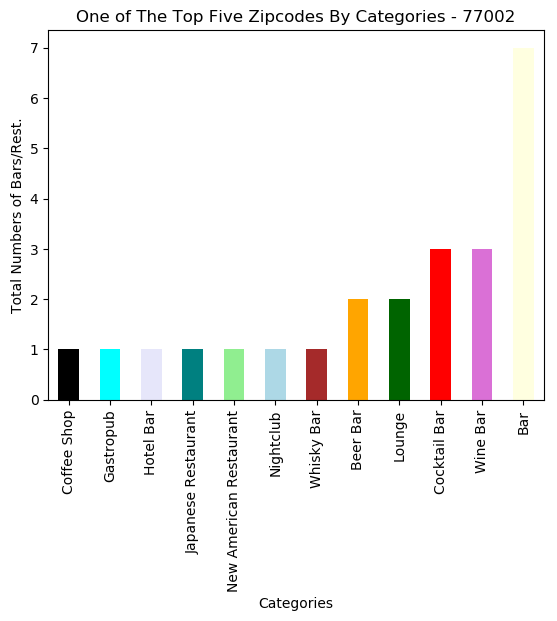

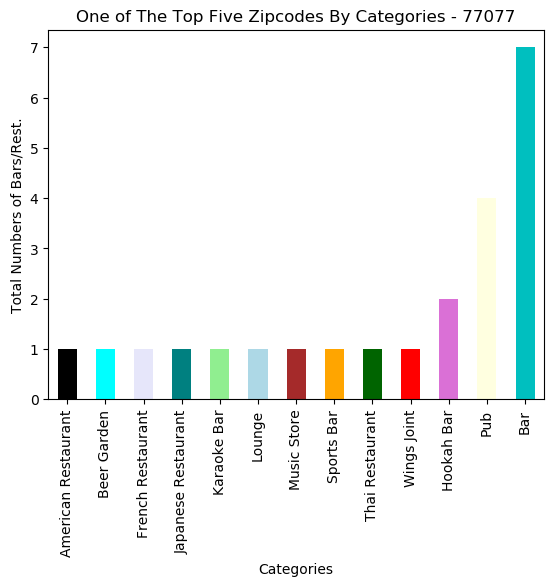

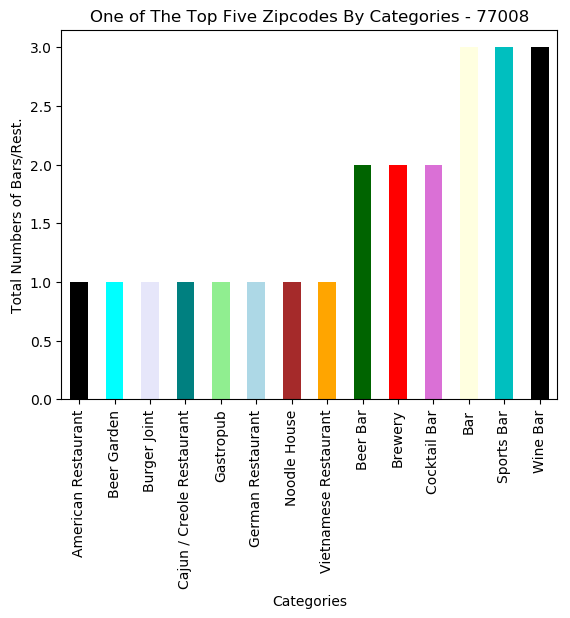

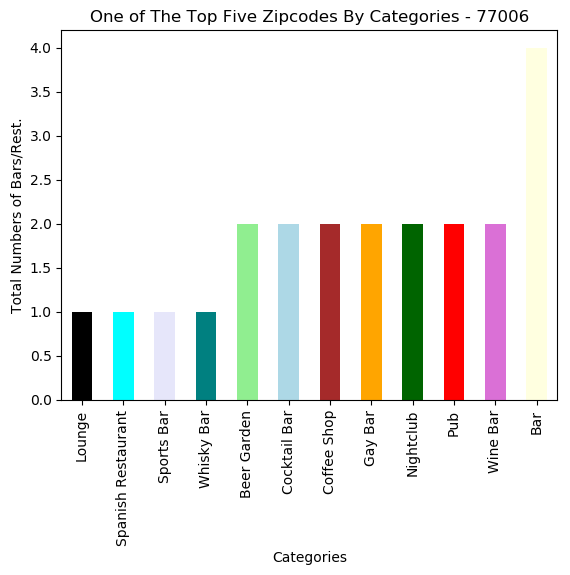

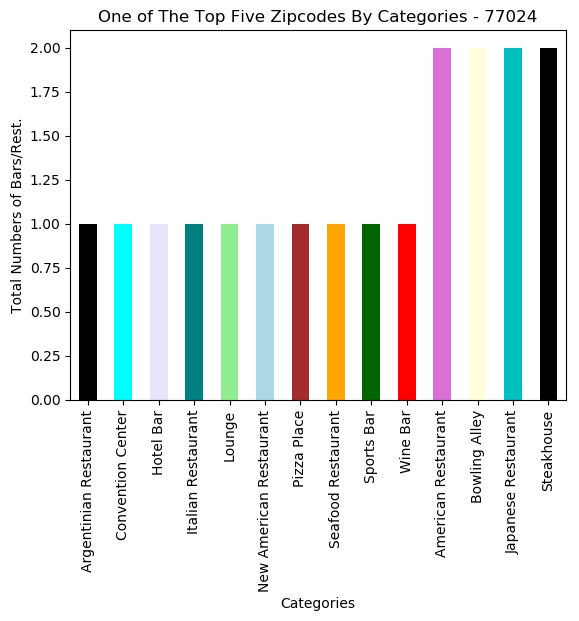

In [24]:
#top5bd.groupby(['location.postalCode','categories']).count().iloc[:,0]

for i in range(len(df1.index.values)): 
    t2 =top5bd.loc[top5bd['location.postalCode'] == df1.index.values[i]].groupby(['categories']).size().sort_values('index')
    #t1=top5bd(top5bd['location.postalCode'] == "77099").groupby(['categories']).size().sort_values('index')
#test = top5bd.groupby(['location.postalCode','categories'], as_index=False).count().iloc[:,0:3]
    t2.plot(x='location.postalCode', y=['categories'], kind="bar",
            color=['black','aqua', 'lavender', 'teal','lightgreen','lightblue','brown','orange','darkgreen','red','orchid','lightyellow','c'])
    plt.xlabel('Categories') # add to x-label to the plot
    plt.ylabel('Total Numbers of Bars/Rest.') # add y-label to the plot
    plt.title('One of The Top Five Zipcodes By Categories'+' - '+''.join(df1.index.values[i])) # add title to the plot
    plt.show()


#test

#t1=test.pivot(index='location.postalCode', columns='categories', values='index')

# #t1.plot(x='location.postalCode', y=['categories'], kind="bar")


#t1
# plt.show()


#pd.DataFrame(top5bd)

In [25]:
from folium.plugins import MarkerCluster


map_bd = folium.Map(location=[29.749907, -95.358421], zoom_start=11)

marker_cluster = MarkerCluster().add_to(map_bd)

#i=0
for lat, lng, label,zc in zip(top5bd['location.lat'], top5bd['location.lng'], top5bd['categories']+" - "+top5bd['name']+" - "+top5bd['location.postalCode'],top5bd['location.postalCode']):
        #if i < 1000:
            label = folium.Popup(label,parse_html=True)#parse_html=True
            #tooltip = "Zipcode:{} Click for more".format(top5bd['location.postalCode'][zc])
            #zc = folium.Popup(label,parse_html=True)
            #data=zc,
            #columns=['location.postalCode', col],
            folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            #color='light blue',
            fill=True,
            fill_color='OrRd',
            fill_opacity=0.7,
            line_opacity=0.3,
            parse_html=False,
            ).add_to(marker_cluster)#parse_html=True
            #i=i+1
       
    
map_bd

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['location.postalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
zipcode_sorted = pd.DataFrame(columns=columns)
zipcode_sorted['location.postalCode'] = bdg['location.postalCode']

for ind in np.arange(bdg.shape[0]):
    zipcode_sorted.iloc[ind, 1:] = return_most_common_venues(bdg.iloc[ind, :], num_top_venues)

zipcode_sorted

,location.postalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,77002,Bar,Cocktail Bar,Wine Bar,Lounge,Beer Bar
1,77003,Brewery,Bar,Cocktail Bar,Hookah Bar,Nightclub
2,77004,Bar,Cocktail Bar,Sports Bar,Beer Bar,Brewery
3,77005,Bar,Wine Bar,Hotel Bar,Italian Restaurant,Beer Bar
4,77006,Bar,Nightclub,Coffee Shop,Cocktail Bar,Pub
5,77007,Bar,American Restaurant,Lounge,Gastropub,Beer Garden
6,77008,Sports Bar,Wine Bar,Bar,Cocktail Bar,Beer Bar
7,77009,Bar,Wine Bar,Tiki Bar,Pub,Mexican Restaurant
8,77010,Hotel,Sports Bar,New American Restaurant,Gastropub,Hotel Bar
9,77011,Wine Bar,Bar,Beer Garden,General Entertainment,Distillery


In [27]:
#to get list of zip with city and county
#DO NOT DELETE

# html = requests.get('http://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=48201').content
# df_list = pd.read_html(html)
# df_list
# houston_zipn = df_list[2]
# houston_zipn

In [54]:
#print('Below tables gives you detail information on where you can have liquor/alcohol drinks')
ui=input('Please Enter The ZipCode You Are Interested In:'+str())

a1=zipcode_sorted[zipcode_sorted['location.postalCode']==ui]
a2=bd[bd['location.postalCode']==ui]
print('\n \033[1m'+'Below tables gives you detail information on all the liquor/alcohol places in:'+ui)
#print(a1)
print('\033[1m'+'Table 1')
display(a1)
print('\033[1m'+'Table 2')
print('\033[1m'+'\n liquor/alcohol places in: '+ui)
display(a2)

Please Enter The ZipCode You Are Interested In:77002

 Below tables gives you detail information on all the liquor/alcohol places in:77002
Table 1


,location.postalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,77002,Bar,Cocktail Bar,Wine Bar,Lounge,Beer Bar


Table 2

 liquor/alcohol places in: 77002


,index,name,categories,location.address,location.lat,location.lng,location.postalCode
14,22,Secret Garden,Bar,409 Travis St,29.761415,-95.362294,77002
15,23,Flying Saucer Draught Emporium,Beer Bar,705 Main St,29.759116,-95.363216,77002
18,26,Coterie,Coffee Shop,737 Preston St,29.762856,-95.363190,77002
40,50,Henke & Pillot,Lounge,809 Congress St,29.763101,-95.362025,77002
42,56,Dahlia,Bar,2901 Fannin St,29.742761,-95.374770,77002
44,68,Azuma Sushi & Robata Bar,Japanese Restaurant,909 Texas St,29.760168,-95.362965,77002
45,73,Red & White Wine Bistro,Wine Bar,Near Section 101,29.750101,-95.362623,77002
46,79,Holman Draft Hall,Beer Bar,820 Holman St,29.740245,-95.379784,77002
85,295,Hearsay Gastro Lounge,New American Restaurant,218 Travis St,29.762867,-95.361763,77002
86,296,La Carafe,Wine Bar,813 Congress St,29.763041,-95.361904,77002
